# 0. Применение метода KNN для решения задачи классификации

Набор данных получен в результате переписи населения 1994 года и содержит информацию о некотором количестве людей, проживающих в США. Задача состоит в том, чтобы предсказать, зарабатывает человек более $50к в год или нет. Список признаков:

*   <b>age</b>: возраст человека.
*   <b>workclass</b>: статус занятости.
*   <b>fnlwgt</b>: количество людей, которое, по мнению переписи, представляет запись.
*   <b>education</b>: высший уровень образования, достигнутый человеком.
*   <b>education-num</b>: высший уровень образования, достигнутый человеком в числовой форме.
*   <b>marital-status</b>: семейное положение человека.
*   <b>occupation</b>: общий род занятий человека.
*   <b>relationship</b>: представляет то, чем этот человек является по отношению к другим (перекликается с признаком <b>marital-status</b>).
*   <b>race</b>: раса.
*   <b>sex</b>: пол.
*   <b>capital-gain</b>: прирост капитала.
*   <b>capital-loss</b>: убыток капитала.
*   <b>hours-per-week</b>: число рабочих часов в неделю.
*   <b>native-country</b>: страна происхождения.
*   <b>the label</b>: отклик -- зарабатывает больше $50к или меньше.



## Немного про метрики качества модели

Для начала рассмотрим так называемую матрицу ошибок (confusion matrix)
-- способ разделить объекты на $4$ группы в зависимости от комбинации
истинного класса и ответа классификатора:

-   TP (True Positives) -- верно классифицированные объекты, исходно     относящиеся к классу "$+1$";

-   TN (True Negatives) -- верно классифицированные объекты, исходно     относящиеся к классу "$-1$";

-   FN (False Negatives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$+1$" (ошибка I рода);

-   FP (False Positives) -- неверно классифицированные объекты, исходно     относящиеся к классу "$-1$" (ошибка II рода).

Обычно, конечно, оперируют не абсолютными показателями, а относительными
-- долями (rates), находящимися в диапазоне от $0$ до $1$:

-   доля правильных ответов классификатора (иногда -- точность): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ Эта величина показывает отношение количества верно классифицированных объектов к общему количеству классифицируемых объектов и, грубо говоря, оценивает вероятность случайному объекту быть правильно классифицированным.

-   доля истинно положительных примеров -- True Positives Rate (TPR) или     Sensitivity (чувствительность) или Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ Эта величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$+1$", к общему количеству объектов класса "$+1$". Иными словами -- это оценка вероятности, что объект, относящийся к классу "$+1$" будет классифицирован корректно.

-   доля ложно положительных примеров обозначается как -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ Величина показывает отношение количества неверно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован неверно.

-   Специфичность (Specificity) или True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ Величина показывает отношение количества верно классифицированных объектов, относящихся к классу "$-1$", к общему количеству объектов класса "$-1$", или оценивает вероятность, что объект, относящийся к классу "$-1$", будет классифицирован верно.

-   Precision (точность): $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ Величина показывает, какая доля объектов, отнесенных классификатором к классу "$+1$", действительно относится к этому классу.

Естественно возникает вопрос, нет ли какого-то обобщающего критерия,
который может характеризовать качество построенной модели. Один из них --
так называемая $F$-мера ($F_1$-мера, $F$ score, $F_1$ score)
определяется следующим соотношением:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Замечание**. *$F$-мера является средним гармоническим величин
$\mathsf{Precision}$ и $\mathsf{Recall}$ и заключена в диапазоне
$[0, 1]$. Среднее гармоническое обладает важным свойством: оно близко к
нулю, если хотя бы один из аргументов близок к нулю. Поэтому оно является
куда более предпочтительным, чем, скажем, среднее арифметическое: если
алгоритм относит все объекты к положительному классу, то
$\mathsf{Recall}= 1$, а $\mathsf{Precision}$, скорее всего, будет
небольшим. Но тогда среднее арифметическое будет больше, чем $0.5$, что,
конечно, никуда не годится.*

## Импорт библиотек и чтение набора данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/data_science/datasets/"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(way + 'adult_data_train.csv')
df = df.drop(['education', 'marital-status'], axis = 1)
df.head(5)

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


Считайте набор данных в датафрейм. Исходя из описания признаков можно сразу избавиться от признаков <code>education</code> и <code>marital-status</code>. Удалите соответствующие колонки из набора данных.

Определите количество числовых и нечисловых признаков.

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label              int64
dtype: object

Постройте гистограмму распределения объектов по классам. Вычислите долю объектов класса $0$.

In [ ]:
df.shape

(26048, 13)

In [ ]:
zero_size = df.loc[df['label'] == 0].shape[0]
zero_size / df.shape[0]

0.7591753685503686

# 1. Построение базовой модели

В качестве первого приближения имеет смысл построить модель классификации, опираясь исключительно на числовые признаки.

Отберите из набора данных только числовые признаки. При помощи <code>train_test_split()</code> разбейте набор данных на обучающую и тестовую выборки <b>с параметрами, указанными в вашем задании</b>. Используйте стратификацию по колонке <code>label</code>.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных.

Обучите модель <code>KNeighborsClassifier()</code> с параметрами по умолчанию на тренировочных данных. 

Как видно из предыдущего пункта, в наборе данных наблюдается явный дисбаланс представителей классов. Это следует учесть при оценке модели. Вычислите <code>f1_score</code> модели на тестовых данных (рекомендуем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">соответствующую функцию</a> с параметрами по умолчанию.

В качестве альтернативы можно использовать так называемый <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, где приведены сразу несколько метрик (не стоит забывать про параметр <code>digits</code>).

In [ ]:
df_dig = df.drop(['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis = 1)

In [ ]:
model = KNeighborsClassifier()

In [ ]:
train_df, test_df = train_test_split(df_dig, test_size=0.2, random_state=9, stratify=df_dig['label'])

model.fit(train_df.drop('label', axis=1), train_df['label'])
pred_df = model.predict(test_df.drop('label', axis=1))

f1_score(test_df['label'], pred_df)

0.39121552604698673

In [ ]:
train_df['fnlwgt'].mean()

190095.05134849795

Стоит помнить, что KNN является метрическим классификатором, поэтому значения признаков перед обучением модели следует нормировать.

Обучите преобразование <code>MinMaxScaler()</code> на тренировочном наборе данных и примените его для тренировочных и тестовых данных.

Вычислите выборочное среднее колонки <code>fnlwgt</code> тренировочного набора данных после нормировки.

Заново обучите и оцените модель на преобразованных данных. Вычислите <code>f1_score()</code> модели.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_df)

scaled_x = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
scaled_x_test = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

model.fit(scaled_x.drop('label', axis=1), scaled_x['label'])
pred_df = model.predict(scaled_x_test.drop('label', axis=1))

f1_score(scaled_x_test['label'], pred_df)

0.5197792088316467

In [ ]:
X_train = train_df
X_train_scaled = scaler.transform(X_train)

train_df.loc[:, X_train.columns] = pd.DataFrame(X_train_scaled).values
train_df.head(5)

<ipython-input-35-0355c8eb434f>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, X_train.columns] = pd.DataFrame(X_train_scaled).values


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
6712,0.452055,0.109727,0.866667,0.0,0.0,0.500000,1.0
9509,0.493151,0.136691,0.600000,0.0,0.0,0.214286,0.0
11873,0.041096,0.138428,0.533333,0.0,0.0,0.244898,0.0
6604,0.109589,0.109672,0.866667,0.0,0.0,0.367347,0.0
13261,0.328767,0.157980,0.533333,0.0,0.0,0.500000,0.0


In [ ]:
X_test = test_df
X_test_scaled = scaler.transform(X_test)

test_df.loc[:, X_test.columns] = pd.DataFrame(X_test_scaled).values
test_df.head(5)

<ipython-input-36-2b0146382c80>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.loc[:, X_test.columns] = pd.DataFrame(X_test_scaled).values


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
3237,0.068493,0.120058,0.800000,0.00000,0.000000,0.500000,0.0
15671,0.589041,0.124703,0.800000,0.00000,0.000000,0.448980,1.0
22088,0.424658,0.226738,0.600000,0.03325,0.000000,0.530612,0.0
19676,0.397260,0.099057,0.533333,0.00000,0.365014,0.428571,0.0
25570,0.082192,-0.000755,0.600000,0.00000,0.000000,0.295918,0.0


In [ ]:
model.fit(train_df.drop('label', axis=1), train_df['label'])
pred_df = model.predict(test_df.drop('label', axis=1))

f1_score(test_df['label'], pred_df)

0.5197792088316467

In [ ]:
train_df['fnlwgt'].mean()

0.11920930242028344

Видно, что после линейной нормировки качество выросло. 

<b>Важно: </b>На дальнейших этапах подразумевается использование линейной нормировки непосредственно перед обучением без дополнительных напоминаний.

# 2. Работа с нечисловыми признаками

## Визуализация

Для дальнейшего улучшения качества модели имеет смысл задействовать нечисловые признаки исходного датасета (без колонок <code>education</code> и <code>marital-status</code>). 

Постройте гистограммы, иллюстрирующие частоту того или иного значения по каждому нечисловому признаку, например, при помощи <code>sns.barplot()</code>.

In [ ]:
def bar_sns(category):
  category_counts = df[category].value_counts()
  sns.barplot(x=category_counts.index, y=category_counts.values)

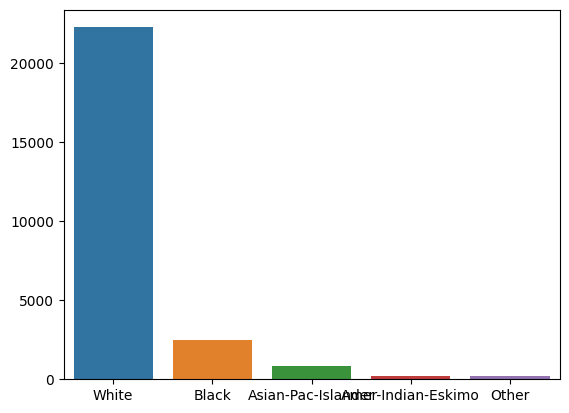

In [ ]:
nondig_cat = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']
bar_sns('race')

## Удаление пропущенных значений

Определите число строк исходного набора данных (без колонок <code>education</code> и <code>marital-status</code>), в которых присутствует хотя бы одно пропущенное значение.

In [ ]:
df_lost = df.applymap(lambda x: x == '?').any(axis=1).sum()
df_lost

1914

Видно, что в датасете содержится менее 10% строк, содержащих пропуски. Выкидывать такое количество строк — не очень хорошее дело, но почему бы не попробовать обойтись без них. 

Удалите строки, содеражащие пропуски. Произведите <code>one-hot</code> кодировние нечисловых признаков, например, с помощью <code>pd.get_dummies(drop_first=True)</code>.

Введите число полученных признаков.

In [ ]:
df3 = df[~df.applymap(lambda x: x == '?').any(axis=1)]
df3 = pd.get_dummies(df3)
df3.shape

(24134, 82)

Обучите модель классификации аналогично тому, как это было проделано для базовой модели. Вычислите <code>f1_score()</code> модели.



In [ ]:
train_df, test_df = train_test_split(df3, test_size=0.2, random_state=9, stratify=df3['label'])

scaler = MinMaxScaler()
scaler.fit(train_df)

scaled_x = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
scaled_x_test = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

model.fit(scaled_x.drop('label', axis=1), scaled_x['label'])
pred_df = model.predict(scaled_x_test.drop('label', axis=1))

f1_score(scaled_x_test['label'], pred_df)

0.6172291296625222

Точность модели увеличилась по сравнению с моделью, которая использовала только числовые признаки.

## Заполнение пропущенных значений

Возможно точность еще повысится, если задействовать строки с пропущенными значениями. Используя исходный датасет (без колонок <code>education</code> и <code>marital-status</code>), заполните пропуски самым часто встречающимся значением в рамках столбца.

In [ ]:
df4 = df.copy()

for col in df4.columns:
    # Найдите самое частое значение в столбце (игнорируя '?')
    most_frequent_value = df4[col].value_counts().index[0]
    if most_frequent_value == '?':
        most_frequent_value = df4[col].value_counts().index[1]

    # Замените все '?' на самое частое значение в столбце
    df4[col] = df4[col].replace('?', most_frequent_value)


Далее по уже знакомому сценарию: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, обучение и оценка.

Вычислите <code>f1_score()</code> модели.

In [ ]:
df4 = pd.get_dummies(df4, drop_first=True)
train_df, test_df = train_test_split(df4, test_size=0.2, random_state=9, stratify=df4['label'])

scaler = MinMaxScaler()
scaler.fit(train_df)

scaled_x = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
scaled_x_test = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)

model.fit(scaled_x.drop('label', axis=1), scaled_x['label'])
pred_df = model.predict(scaled_x_test.drop('label', axis=1))

f1_score(scaled_x_test['label'], pred_df)

0.5919862128392933

## Проклятие размерности

В последнем пункте был получен набор данных, содержащий 76 признаков (кстати, попробуйте объяснить, почему в случае удаления строк число признаков в итоге оказалось равным 75), что является достаточным для того, чтобы столкнуться с так называемым проклятием размерности.

Для того, чтобы классификатор давал более качественные результаты, имеет смысл более внимательно и вдумчиво поработать с признаками с учетом проклятия размерности. Например, вернуть в рассмотрение признаки <code>education-num</code> и <code>marital-status</code>. А также более глубоко вникнуть в саму природу признаков.

# Полный анализ

In [123]:
train_df2 = pd.read_csv(way + 'adult_data_train.csv')
train_df2.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [124]:
test_df2 = pd.read_csv(way + 'adult_data_reserved.csv')
test_df2.shape

(6513, 14)

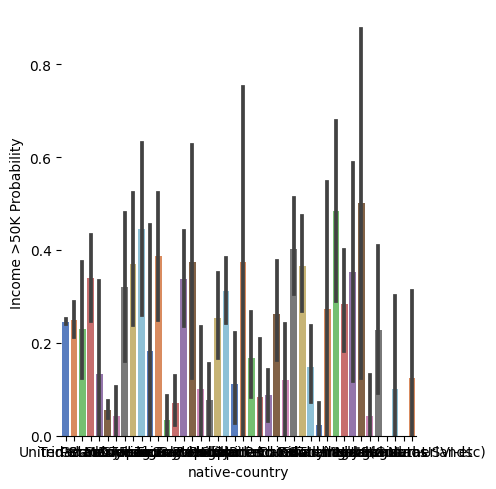

In [125]:
g = sns.catplot(x="native-country",y="label",data=train_df2,kind="bar", palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [126]:
def optimize(df):
    df['workclass'] = df['workclass'].replace('?', 'Nonwork')

    marital_status_mapping = {
        'Never-married': 0,
        'Divorced': 0,
        'Separated': 0,
        'Widowed': 0,
        'Married-civ-spouse': 1,
        'Married-spouse-absent': 1,
        'Married-AF-spouse': 1
    }

    df["marital-status"] = df["marital-status"].map(marital_status_mapping)
    df["marital-status"] = df["marital-status"].astype(int)

    df["sex"] = df["sex"].map({"Male": 0, "Female":1})
    df = df.drop(['education', 'relationship', 'native-country'], axis = 1)
    return df

test_df2 = optimize(test_df2)
train_df2 = optimize(train_df2)

In [127]:
test_df2.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week
0,31,Self-emp-inc,117963,16,0,Prof-specialty,White,0,0,0,40
1,20,Nonwork,201490,10,0,?,White,0,0,0,40
2,78,Self-emp-inc,385242,13,1,Exec-managerial,White,0,9386,0,45


In [128]:
train_df2 = train_df2[~train_df2.applymap(lambda x: x == '?').any(axis=1)]
train_dum_df2 = pd.get_dummies(train_df2, drop_first=True)

#test_df2 = test_df2[~test_df2.applymap(lambda x: x == '?').any(axis=1)]
test_dum_df2 = pd.get_dummies(test_df2, drop_first=True)

missing_cols = set(train_dum_df2.columns) - set(test_dum_df2.columns)
for col in missing_cols:
    test_dum_df2[col] = 0

missing_cols = set(test_dum_df2.columns) - set(train_dum_df2.columns)
for col in missing_cols:
    train_dum_df2[col] = 0

test_dum_df2 = test_dum_df2[train_dum_df2.columns]


scaler = MinMaxScaler()
scaler.fit(train_dum_df2)


scaled_train = pd.DataFrame(scaler.transform(train_dum_df2), columns=train_dum_df2.columns)

scaled_test = pd.DataFrame(scaler.transform(test_dum_df2), columns=test_dum_df2.columns)

In [129]:
scaled_test.shape

(6513, 35)

In [130]:
#model = KNeighborsClassifier()
#model.fit(scaled_train.drop('label', axis=1), scaled_train['label'])
#pred_df = model.predict(scaled_test.drop('label', axis=1))


In [133]:
#from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators=100, max_features=3)
#model.fit(scaled_train.drop('label', axis=1), scaled_train['label'])
#pred_df = model.predict(scaled_test.drop('label', axis=1))

In [135]:
with open(way + 'ans.txt', 'w') as f:
    f.write('[')
    f.write(','.join(map(str, pred_df.astype(int))))
    f.write(']')

In [132]:
scaled_train.shape

(24569, 35)